# U-Net++: A Nested U-Net Architecture for Medical Image Segmentation
 
## Implementation of the UNet++ Architecture - <br>

### Original Paper
The original paper can be accesss @ https://arxiv.org/abs/1807.10165

### Why UNet++, when we have UNet? 
UNet works on the idea of skip connections. U-Net concatenates them and add convolutions and non-linearities between each up-sampling block. The skip connections recover the full spatial resolution at the network output, making fully convolutional methods suitable for semantic segmentation. UNet and other segmentation models based on convolution tend to fuse semantically dissimilar feature maps from the encoder and decoder sub-networks, which may degrade segmentation performance. This is where UNet++ is shown to have an edge over theother players as it bridges the semantic gap between the feature maps of the encoder and decoder prior to fusion thus improving the segmentation performance and output.

### How UNet++ differs from UNet?

UNet++ differs from the original U-Net in the following three ways:

1. UNet++ has nested convolution layers along the skip pathways, which bridges the semantic gap between encoder and decoder feature maps.
2. UNet++ has dense skip connections on skip pathways, which improves gradient flow.
3. UNet++ employs deep supervision, enabling the model to operate in two modes: **1) accurate mode** wherein the outputs from all segmentation branches are averaged; **2) fast mode** wherein the final segmentation map is selected from only one of the segmentation branches, the choice of which determines the extent of model pruning and speed gain.


### UNet++ Architecture

"*UNet++ consists of an encoder and decoder that are **connected through a series of nested dense convolutional blocks**. The main idea behind UNet++ is to bridge the semantic gap between the feature maps of the encoder and decoder prior to fusion.*" 

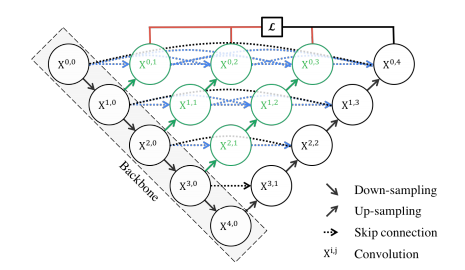

In the image above, black indicates the original U-Net pathways, green and blue show dense convolution blocks on the skip pathways, and red indicates deep supervision. Red, green, and blue components distinguish UNet++ from U-Net

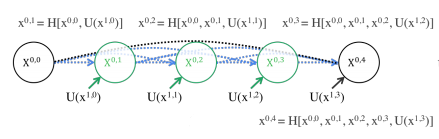

The skip pathway between nodes **X(0, 0)** and **X(1, 3)** consists of a series dense convolution block with three convolution layers where **each convolution layer is preceded by a concatenation layer that fuses the output from the previous convolution layer of the same dense block with the corresponding up-sampled output of the lower dense block**. The dense convolution block brings the semantic level of the encoder feature maps closer to that of the feature maps awaiting in the decoder. 

**H(·)** is a **convolution operation** followed by an activation function, **U(·)** denotes an **up-sampling layer**, and **[ ]** denotes the **concatenation layer***.

**Image Reference -** https://arxiv.org/pdf/1807.10165.pdf


 **Reference:**
 
 [1] https://arxiv.org/abs/1807.10165
 
 
 ### Implementation

In [1]:
# import the UNet++ design framework module.
from UNetPP import UNetPlusPlus

In [2]:
# Initialize the Unet++ with the default parameters. 
# The default params are the one that were used in the original paper.
# Input shape - (512, 512, 1), 
# filters [32, 64, 128, 256, 512]. (as per paper: k = 32 × 2^i). at each convolutional block.
UNetPlusPlus = UNetPlusPlus(deep_supervision = True)

In [3]:
# call the build netowrk API to build the network.
model = UNetPlusPlus.BuildNetwork()

In [4]:
# compile & summarize the model
if model is not None:
    UNetPlusPlus.CompileAndSummarizeModel(model = model)

Model: "UNet++"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputLayer (InputLayer)         [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv00_1 (Conv2D)               (None, 512, 512, 32) 320         InputLayer[0][0]                 
__________________________________________________________________________________________________
X00_ (Dropout)                  (None, 512, 512, 32) 0           conv00_1[0][0]                   
__________________________________________________________________________________________________
conv00_2 (Conv2D)               (None, 512, 512, 32) 9248        X00_[0][0]                       
_____________________________________________________________________________________________

In [5]:
# plot the model and save the network diagram to a file.
if model is not None:
    UNetPlusPlus.plotModel(model = model, dpi = 112)

### UNet++ Network as Designed 

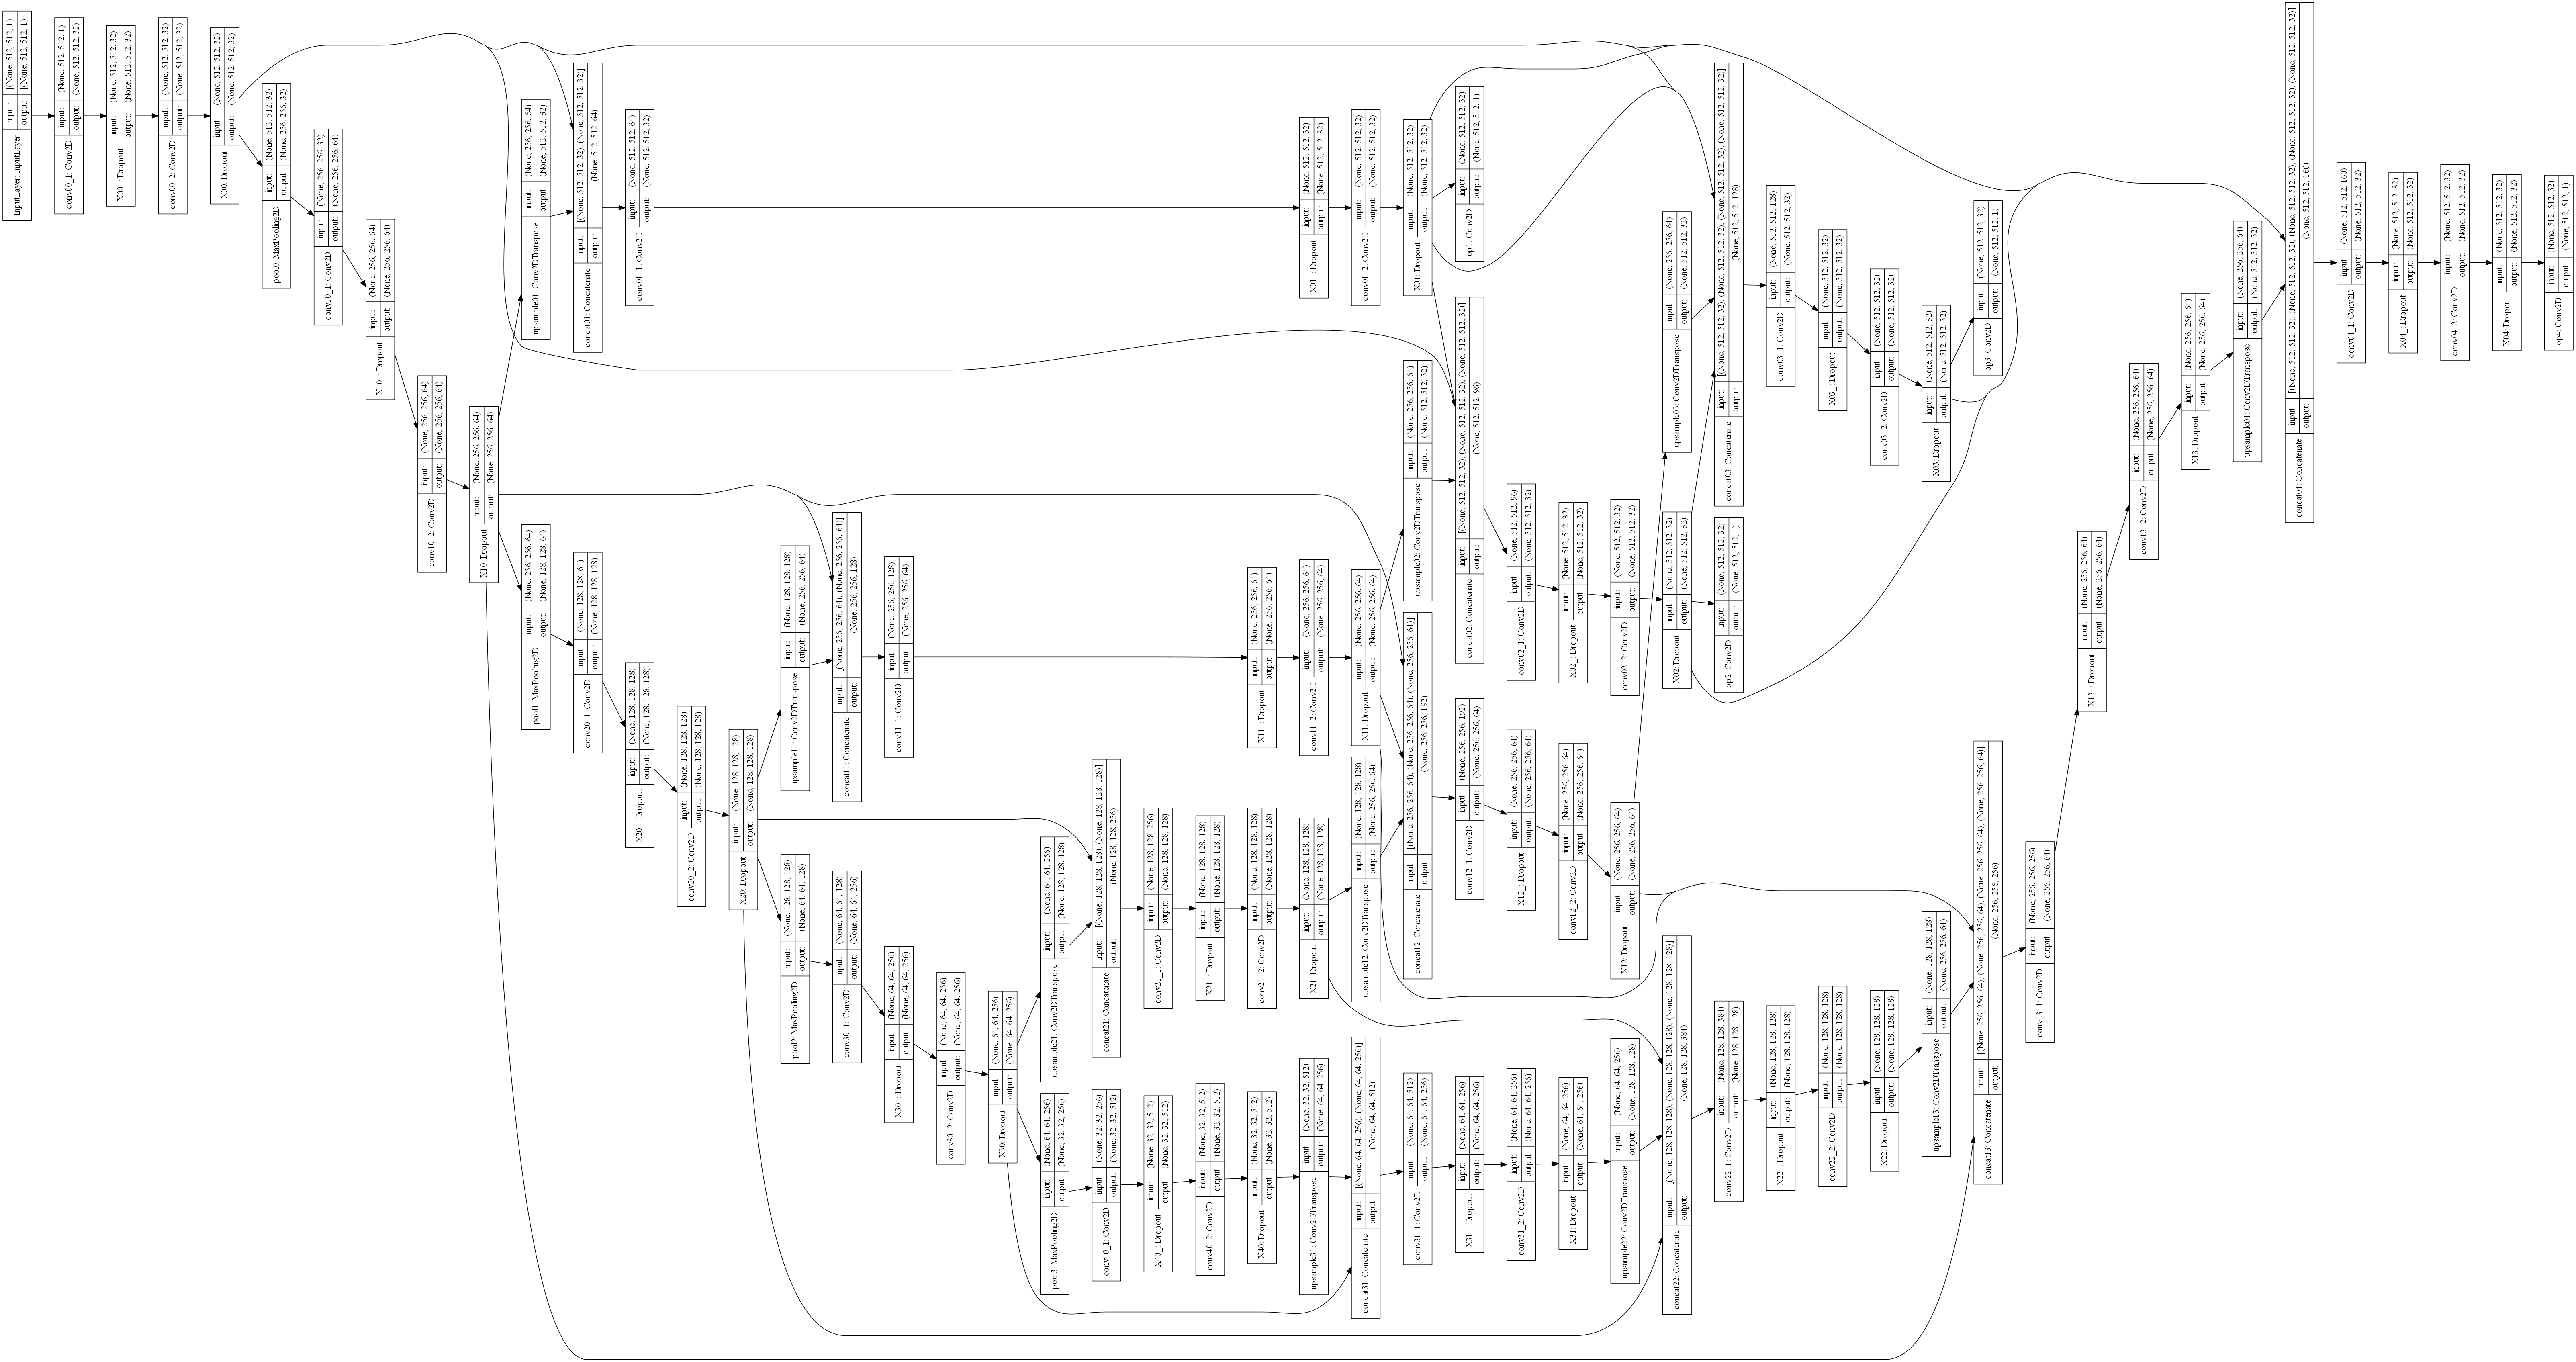

### Skip Pathways as designed

As seen in the image (below) - 

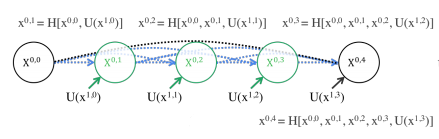

the corresponding unit in the decoder block is a combination of the outputs of convolutions - X00, X01, X02, X03 and upsampled convolution X13. The same is seen in the model summary - 

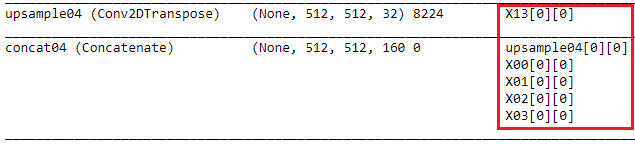